## A3C and ACER

This notebook contains test runs of two RL Algorithms.

Asynchronous Advantage Actor Critic

Asynchronous means multiple agents are trained at the same time and submit asynchronous weight updates to a shared model.
The Gradients are derived from the Advantage Funktion (Q-V).
There is a policy and a critic network, the critic network rates the Value of the actions of the policy.

Actor Critic with Experience Replay uses the innovations of A3C.
Experience Replay increses the sample Efficiency.


In [ ]:
from baselines.common import plot_util as pu
import time
from baselines.run import run, play
import tensorflow as tf

### Default Parameter

In [ ]:

dict(alg='acer', 
     env='CartPole-v0', # This works well with MountainCar-v0
     env_type=None, 
     gamestate=None,
     log_path='./logs/acer-tmp/',
     network=None, 
     num_env=None, 
     num_timesteps=30000.0, 
     play=False, 
     reward_scale=1.0,
     save_path='./models/model', 
     save_video_interval=0, 
     save_video_length=200, 
     seed=0,
     trust_region=True, 
     nsteps=128,
     replay_ratio=4)


## Implementation Details

The Acer implementation can be found in the a3cacerdemo/baselines/acer/acer.py file

### Off-policy learning

During the Experience replay stage the algorithm uses a variant of the retrace algorithm, the function is implemented in baselines.acer.acer:

def q_retrace(R, D, q_i, v, rho_i, nenvs, nsteps, gamma):

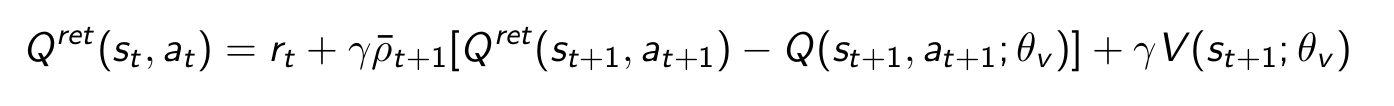

### Trust Regions

The acer paper introduces efficient trust regions which are supposed to stabilize training. 

k is a measure of the divergence of the current network with parameters $\theta$ and an average network with parameters $\theta_a$.

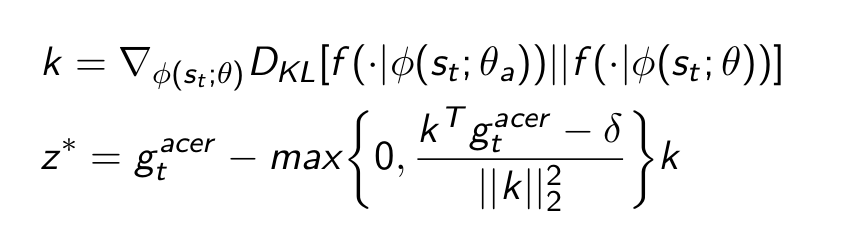

In [ ]:
log_path="./logs/cartpole/"
for seed in range(0,6):
    run(seed=seed, trust_region=True, log_path=f"{log_path}cartpole-{str(seed)}/")

In [ ]:
results = pu.load_results(log_path)
pu.plot_results(results, average_group=True)


In the following the Trust Regions have been turned off. 

In [ ]:
log_path="./logs/cartpole-notrust/"
for seed in range(0,3):
    run(seed=seed,trust_region=False, log_path=f"{log_path}cartpole-notrust-{str(seed)}/")

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

### A3C

A3C can be seen as a special case of Acer with replay_ratio = 0 and no trust regions.
It is an on-policy method

In [ ]:
log_path="./logs/cartpole-notrust-a3c/"
for seed in range(0,3):
    run(seed=seed,replay_ratio=0,trust_region=False, log_path=f"{log_path}cartpole-notrust-a3c-{str(seed)}/")

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

In [ ]:
env="MountainCar-v0"
log_path=f"./logs/{env}/"

for seed in range(0,3):
    run(seed=seed, log_path=f"{log_path}{env}-{str(seed)}/", num_timesteps=3e5)

In [ ]:
results = pu.load_results(log_path)

pu.plot_results(results, average_group=True)

### Play 

In [ ]:
env="MountainCar-v0"
play(load_path="./models/model", env=env)